In [ ]:
# importing dependancies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

In [ ]:
ins_dataset = pd.read_csv('/content/insurance.csv')

In [ ]:
ins_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
ins_dataset.shape

(1338, 7)

Data preprocessing and analising

In [ ]:
ins_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
ins_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
# Statisticial Measures
ins_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
ins_dataset.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [ ]:
correlation = ins_dataset.corr()

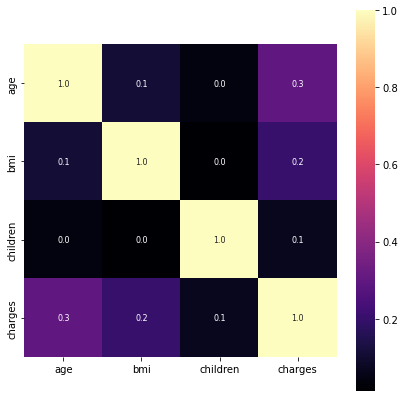

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation, cmap='magma', cbar=True, annot=True, annot_kws={'size':8}, square=True, fmt='.1f')

In [ ]:
# Label Encoding

# Encoding sex
ins_dataset.replace({'sex': {'male':1, 'female':0}}, inplace=True)


#Encoding smoker
ins_dataset.replace({'smoker': {'yes':1, 'no':0}}, inplace=True)

#Encoding region
ins_dataset.replace({'region': {'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [ ]:
ins_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


In [ ]:
ins_dataset['region'].value_counts()

0    364
1    325
3    325
2    324
Name: region, dtype: int64

In [ ]:
ins_dataset['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [ ]:
ins_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Figure size 432x432 with 0 Axes>

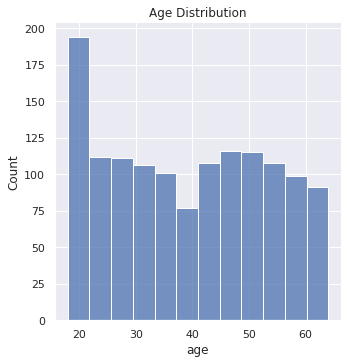

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(ins_dataset['age'])
plt.title('Age Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


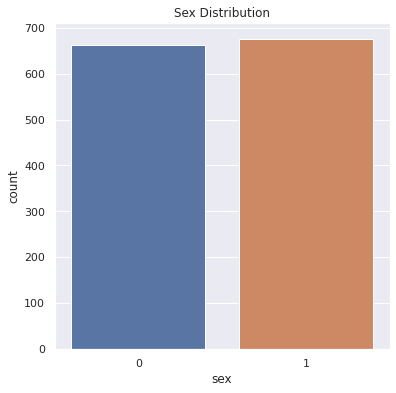

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(ins_dataset['sex'])
plt.title('Sex Distribution')
plt.show()

<Figure size 432x432 with 0 Axes>

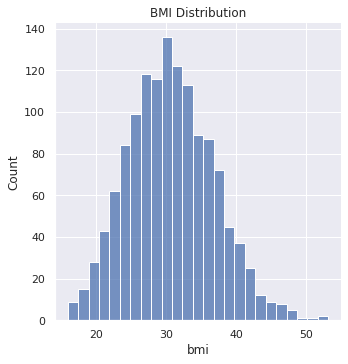

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(ins_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

<Figure size 432x432 with 0 Axes>

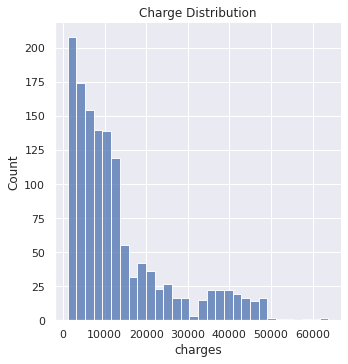

In [ ]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(ins_dataset['charges'])
plt.title('Charge Distribution')
plt.show()

Splitting the features and price

In [ ]:
X = ins_dataset.drop(['charges'], axis=1)
Y = ins_dataset['charges']

In [ ]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       1
1      18    1  33.770         1       0       0
2      28    1  33.000         3       0       0
3      33    1  22.705         0       0       3
4      32    1  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       3
1334   18    0  31.920         0       0       2
1335   18    0  36.850         0       0       0
1336   21    0  25.800         0       0       1
1337   61    0  29.070         0       1       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Train and Test data

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X.values, Y.values, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Trainng :

Logistic Regression

In [ ]:
model = XGBRegressor()

In [ ]:
model.fit(X_train, Y_train)

[06:45:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Model Evaluaton

In [ ]:
# Training data prediction
training_data_prediction = model.predict(X_train)

In [ ]:
# R Squared Error

error_score = metrics.r2_score(Y_train, training_data_prediction)
print("The error for training data is: ", error_score)

The error for training data is:  0.8990140961276583


In [ ]:
# Test data prediction
test_data_prediction = model.predict(X_test)

In [ ]:
# R Squared Error

error_score = metrics.r2_score(Y_test, test_data_prediction)
print("The error for test data is: ", error_score)

The error for test data is:  0.868116552532486


Data Visualization of actual price vs predicted price

In [ ]:
Y_test = list(Y_test)

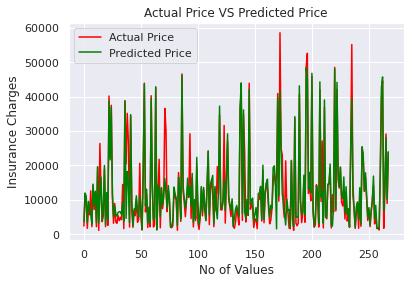

In [ ]:
plt.plot(Y_test, label='Actual Price', color='Red')
plt.plot(test_data_prediction, label='Predicted Price', color='green')
plt.xlabel('No of Values')
plt.ylabel('Insurance Charges')
plt.title('Actual Price VS Predicted Price')
plt.legend()
plt.show()

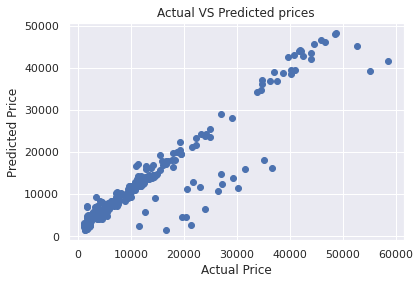

In [ ]:
# Scatter plot
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual VS Predicted prices')
plt.show()

Making Apredictive System

In [ ]:
# Label Encoding

# Encoding sex
ins_dataset.replace({'sex': {'male':1, 'female':0}}, inplace=True)


#Encoding smoker
ins_dataset.replace({'smoker': {'yes':1, 'no':0}}, inplace=True)

#Encoding region
ins_dataset.replace({'region': {'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [ ]:
input_data = (32,1,28.88,0,0,3)

In [ ]:
input_nparray = np.asarray(input_data)

reshaped_array = input_nparray.reshape(1,-1)

prediction = model.predict(reshaped_array)
print(prediction)

print(f"The insurance cost is {prediction} USD .")

[4384.51]
The insurance cost is [4384.51] USD .
